# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [69]:
# importar librerías
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
# Cargar los DataFrames nuevamente con el delimitador correcto
df_orders = pd.read_csv('/datasets/instacart_orders.csv', delimiter=';')
df_products = pd.read_csv('/datasets/products.csv', delimiter=';')
df_order_products = pd.read_csv('/datasets/order_products.csv', delimiter=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', delimiter=';')
df_departments = pd.read_csv('/datasets/departments.csv', delimiter=';')

In [71]:
# mostrar información del DataFrame df_oders
print("Información de df_orders:")
print(df_orders.info())

display(df_orders.sample(6))

Información de df_orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
150518,1710539,170620,5,6,10,30.0
22430,2753135,96396,6,3,10,9.0
426388,3150809,26444,15,2,12,18.0
372514,744284,169495,19,1,13,8.0
414036,3302199,86900,10,5,14,3.0
233535,1881854,101189,6,4,17,7.0


In [72]:
# mostrar información del DataFrame df_products
print("\nInformación de df_products:")
print(df_products.info())

display(df_products.sample(6))


Información de df_products:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


,product_id,product_name,aisle_id,department_id
26731,26732,B-Complex 100 Vegetarian Capsules,47,11
4665,4666,Large Shin Dog Bone,40,8
39525,39526,Hickory Smoked BBQ Dippin' Sauce,5,13
10493,10494,Original Gluten Free Breadcrumbs,5,13
6416,6417,Black Elderberry,47,11
5448,5449,Margherita Pizza,79,1


In [73]:
# mostrar información del DataFrame df_order_products
print("\nInformación de df_order_products:")
print(df_order_products.info())

display(df_order_products.sample(6))


Información de df_order_products:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None


,order_id,product_id,add_to_cart_order,reordered
3198063,1285181,37218,15.0,0
1845163,1474448,48697,4.0,0
520983,147510,26315,32.0,1
3523209,1412406,35725,19.0,0
2240739,900526,20754,3.0,0
424220,2734753,43352,6.0,0


In [74]:
# mostrar información del DataFrame df_aisles
print("\nInformación de df_aisles:")
print(df_aisles.info())

display(df_aisles.sample(6))


Información de df_aisles:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None


,aisle_id,aisle
123,124,spirits
43,44,eye ear care
53,54,paper goods
131,132,beauty
91,92,baby food formula
122,123,packaged vegetables fruits


In [75]:
# mostrar información del DataFrame df_departments
print("\nInformación de df_departments:")
print(df_departments.info())

display(df_departments.sample(6))


Información de df_departments:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None


,department_id,department
2,3,bakery
9,10,bulk
19,20,deli
15,16,dairy eggs
10,11,personal care
1,2,other


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


Los DataFrames proporcionan información detallada sobre pedidos, productos, productos ordenados, pasillos y departamentos en un formato tabular. En df_orders, se encuentran datos clave como 'user_id', 'order_number', 'order_dow', 'order_hour_of_day' y 'days_since_prior_order'. El mismo formato se observa en df_products, df_order_products, df_aisles y df_departments, donde las columnas, tales como 'product_id', 'aisle_id' y 'department_id', son esenciales para entender la relación entre productos, pasillos y departamentos. Sin embargo, se destaca que las columnas en estos DataFrames estaban separadas por punto y coma en lugar de comas, por tanto se ajustó la lectura con el verificador (delimiter=';') para cargar los DataFrames con los datos separados.



# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

- Verificar y corregir tipos de datos:

    - df_orders:
        - Verificar que las columnas 'order_id', 'user_id', 'order_number', 'order_dow', y 'order_hour_of_day' sean de tipo numérico adecuado (preferiblemente enteros).
        - Convertir las columnas mencionadas a tipos numéricos si es necesario.

    - df_products:
        - Verificar que las columnas 'product_id', 'aisle_id', y 'department_id' sean de tipo numérico adecuado.
        - Convertir las columnas mencionadas a tipos numéricos si es necesario.

    - df_order_products:
        - Verificar que las columnas 'order_id', 'product_id', 'add_to_cart_order', y 'reordered' sean de tipo numérico adecuado.
        - Convertir las columnas mencionadas a tipos numéricos si es necesario.
    
- Identificar y completar valores ausentes:
    
    - df_orders, df_products, df_order_products:
        - Revisar si hay valores nulos en estas DataFrames utilizando info() o isnull().sum().
        - Identificar la cantidad y ubicación de los valores nulos.

    - Cómo abordar valores ausentes:
        - Si hay pocos valores nulos, podríamos optar por eliminar las filas afectadas.
        - Si la cantidad de valores nulos es significativa, podemos considerar la imputación de valores utilizando la media, mediana u otros métodos según el contexto. 

- Identificar y eliminar valores duplicados:

    - df_orders, df_products, df_order_products, df_aisles, df_departments:
        - Utilizar duplicated() para identificar duplicados.
        - Considerar la eliminación de duplicados basándonos en la lógica del conjunto de datos (por ejemplo, si un 'order_id' está duplicado, podría ser un error).
        - Eliminar duplicados utilizando drop_duplicates().

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [76]:
# Identificar duplicados basándote en todas las columnas
duplicates =df_orders.duplicated().sum()
print("Número de filas duplicadas en df_orders:", duplicates)
print()

duplicates = df_orders.duplicated()

# Muestra las filas duplicadas
duplicated_rows = df_orders[duplicates]
print("Mostrando las filas duplicadas:")
display(duplicated_rows)

Número de filas duplicadas en df_orders: 15

Mostrando las filas duplicadas:


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?


Sí, hay líneas duplicadas en el DataFrame df_orders. Al revisar las filas duplicadas, se puede observar que tienen en común la columna 'order_id'. Esto indica que los duplicados están relacionados con pedidos específicos que donde se repite el mismo 'order_id'.

Algunas columnas, como 'user_id', 'order_number', 'order_dow', 'order_hour_of_day' y 'days_since_prior_order', también tienen valores idénticos, sin embargo, ya que 'order_id' debería ser único para cada pedido, parece apropiado conservar la primera aparición del pedido y eliminar las duplicadas. Vamos a utilizar la función drop_duplicates() para eliminar las filas duplicadas basándonos en 'order_id'.

In [77]:
# Verificando todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
wednesday_orders_2am = df_orders[(df_orders['order_dow'] == 2) & (df_orders['order_hour_of_day'] == 2)]
print("Pedidos realizados el miércoles a las 2:00 a.m.:")
display(wednesday_orders_2am)

Pedidos realizados el miércoles a las 2:00 a.m.:


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
1295,1474941,115569,5,2,2,28.0
2391,1640269,173965,15,2,2,2.0
2550,1223696,55276,11,2,2,30.0
5965,579194,85018,14,2,2,11.0
17680,2004230,203121,4,2,2,8.0
...,...,...,...,...,...,...
457660,1562381,19378,5,2,2,6.0
460316,1986084,117453,81,2,2,8.0
462676,1362113,19654,20,2,2,21.0
472800,1746383,88484,19,2,2,5.0


¿Qué sugiere este resultado?

Sugiere que hay pedidos específicos realizados regularmente los miércoles a las 2:00 a.m., contiene 121 filas que cumplen con la condición de horario. Cada fila representa un pedido realizado los miércoles a las 2:00 a.m. e incluye información detallada sobre ese pedido, como el order_id, user_id, order_number, order_dow (día de la semana), order_hour_of_day (hora del día) y days_since_prior_order (días desde el pedido anterior).

Esta información puede ser útil para entender los patrones de compra de los usuarios en este día y en este horario, también se puede sugerir patrones y tendencias específicas de cada cuanto tiempo los usuarios deciden realizar pedidos en este día y horario. Por ejemplo, se podría analizar las rutinas de compra, es decir, que prefieran realizar sus pedidos de forma regular en este día y horario, o manejar algun tipo de promoción o descuento para este dia y horario para incentivar los pedidos en este rango de tiempo, etc. 

Analizar los patrones de compra es un ejemplo de lo que podría ser valioso para la empresa, comprender el comportamiento de compra de sus usuarios.

In [78]:
# Eliminar duplicados basados en 'order_id'
df_orders_cleaned = df_orders.drop_duplicates(subset='order_id', keep='first')

# Reiniciar el índice y eliminar el antiguo en df_orders_cleaned
df_orders_cleaned.reset_index(drop=True, inplace=True)

In [79]:
# Imprimir el DataFrame para verificar el índice
display(df_orders_cleaned)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478947,3210681,5617,5,1,14,7.0
478948,3270802,112087,2,3,13,6.0
478949,885349,82944,16,2,11,6.0
478950,216274,4391,3,3,8,8.0


In [80]:
# Verificar que los duplicados se hayan eliminado
print("Información después de eliminar duplicados:")
print(df_orders_cleaned.info())

Información después de eliminar duplicados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None


In [81]:
# Verificar si hay IDs duplicados de pedidos
duplicated_order_ids = df_orders_cleaned.duplicated(subset='order_id', keep=False)

# Mostrar las filas duplicadas basadas en 'order_id'
duplicated_order_ids_rows = df_orders_cleaned[duplicated_order_ids]
print("Filas duplicadas basadas en 'order_id':")
print(duplicated_order_ids_rows)

Filas duplicadas basadas en 'order_id':
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos

Después de la limpieza de duplicados en el DataFrame df_orders_cleaned, se observa que ahora contiene 478,952 entradas únicas. Se identificaron algunos valores nulos en la columna 'days_since_prior_order', totalizando 450,135 no nulos de las 478,952 entradas. La reducción en el número total de entradas únicas confirma la efectividad de la eliminación de duplicados en la base de datos de pedidos. La presencia de valores nulos en 'days_since_prior_order' sugiere que algunos clientes realizaron su primer pedido, y por lo tanto, no hay un valor asignado para "días desde el pedido anterior". Además, no se encontraron IDs de pedidos duplicados después de la limpieza, respaldando la eficacia del proceso de eliminación de duplicados.

### `products` data frame

In [82]:
# Verificar si hay filas totalmente duplicadas en df_products
duplicated_rows_products = df_products[df_products.duplicated()]

# Mostrar las filas totalmente duplicadas
print("Filas totalmente duplicadas en df_products:")
print(duplicated_rows_products)



Filas totalmente duplicadas en df_products:
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []


In [83]:
# Verificando si hay IDs duplicadas de productos
duplicates_products_id = df_products[df_products.duplicated(subset='product_id', keep=False)]
print("Número de IDs duplicados de productos:", len(duplicates_products_id))
print("IDs duplicados de productos:")
print(duplicates_products_id['product_id'].unique())

Número de IDs duplicados de productos: 0
IDs duplicados de productos:
[]


In [84]:
#Revisando si hay nombres duplicados de productos convirtiendo los nombres a letras mayúsculas
df_products['product_name_upper'] = df_products['product_name'].str.upper()
duplicates_products_names = df_products[df_products.duplicated(subset='product_name_upper', keep=False)]
print("\nNombres duplicados de productos (mayúsculas) en df_products:", len(duplicates_products_names))
print()
print("Nombres duplicados de productos:")
print(duplicates_products_names['product_name_upper'].sort_values().unique())
df_products.drop(columns=['product_name_upper'], inplace=True)



Nombres duplicados de productos (mayúsculas) en df_products: 1465

Nombres duplicados de productos:
['18-IN-1 HEMP PEPPERMINT PURE-CASTILE SOAP'
 'AGED BALSAMIC VINEGAR OF MODENA' 'ALBACORE SOLID WHITE TUNA IN WATER'
 'AMERICAN CHEESE SLICES' 'ANCHOVY FILLETS IN OLIVE OIL'
 'APRICOT ENERGY BAR' 'BAG OF ORANGES' 'BAG OF ORGANIC LEMONS'
 'BALSAMIC VINEGAR OF MODENA' 'BBQ SAUCE' 'BEEF CHILI WITH BEANS'
 'BEEF RAVIOLI IN TOMATO & MEAT SAUCE' 'BIOTIN 1000 MCG' 'BLANC DE NOIRS'
 'BLEU CHEESE SALAD DRESSING AND DIP' 'BURRITO- STEAK & CHEESE'
 'CANDY BAR' 'CARROT AND CELERY STICKS' 'CAULIFLOWER HEAD'
 'CHICKEN IN A BISKIT BAKED SNACK CRACKERS' 'CHICKEN WITH RICE SOUP'
 'CHILI WITH BEANS' 'CHIPOTLE PEPPERS IN ADOBO SAUCE'
 'CHOPPED GARLIC IN WATER' 'CHUNK LIGHT TUNA IN VEGETABLE OIL'
 'CHUNK LIGHT TUNA IN WATER' 'CINNAMON ROLLS WITH ICING'
 'COCONUT JUICE WITH PULP' 'CONCENTRACE TRACE MINERAL DROPS'
 "COOKIES 'N CREAM ICE CREAM" 'COSMIC BROWNIES WITH CHOCOLATE CHIP CANDY'
 'CREAM OF CELERY CON

In [85]:
# Verificar nombres duplicados de productos no faltantes
duplicated_product_names_notnull = df_products[df_products.duplicated(subset='product_name', keep=False) & df_products['product_name'].notnull()]

# Mostrar las filas duplicadas basadas en 'product_name' (no faltantes)
print("\nNombres duplicados de productos no faltantes en df_products:")
print(duplicated_product_names_notnull)

# Convertir todos los nombres de productos a mayúsculas
df_products['product_name_upper'] = df_products['product_name'].str.upper()

# Verificar nombres duplicados de productos en mayúsculas
duplicated_product_names_upper = df_products[df_products.duplicated(subset='product_name_upper', keep=False)]

# Mostrar las filas duplicadas basadas en 'product_name' en mayúsculas
print("\nNombres duplicados de productos en mayúsculas en df_products:")
print(duplicated_product_names_upper)

# Eliminar la columna auxiliar
df_products = df_products.drop(columns=['product_name_upper'])


Nombres duplicados de productos no faltantes en df_products:
Empty DataFrame
Columns: [product_id, product_name, aisle_id, department_id]
Index: []

Nombres duplicados de productos en mayúsculas en df_products:
       product_id                                     product_name  aisle_id  \
37             38                                              NaN       100   
41             42                                  Biotin 1000 mcg        47   
71             72                                              NaN       100   
109           110                                              NaN       100   
185           186       Fresh Scent Dishwasher Detergent with Dawn        74   
...           ...                                              ...       ...   
49689       49690                    HIGH PERFORMANCE ENERGY DRINK        64   
49690       49691                    ORIGINAL PANCAKE & WAFFLE MIX       130   
49691       49692  ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR  

In [86]:
# Identificar y mantener una única entrada para 'Unknown'
df_products.loc[df_products['product_name'] == 'Unknown', 'product_name'] = 'UNKNOWN'

# Normalizar la capitalización de los demás nombres de productos
df_products['product_name'] = df_products['product_name'].str.upper()

# Eliminar duplicados después de la normalización
df_products_cleaned = df_products.drop_duplicates(subset='product_name')

# Mostrar información sobre los duplicados corregidos
print("Información después de abordar duplicados:")
print(df_products_cleaned.info())


Información después de abordar duplicados:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48333 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     48333 non-null  int64 
 1   product_name   48332 non-null  object
 2   aisle_id       48333 non-null  int64 
 3   department_id  48333 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ MB
None


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Los resultados revelan que hay nombres de productos duplicados en el DataFrame df_products. Primero, se identificaron 1258 duplicados cuando se consideran los nombres de productos sin distinción entre mayúsculas y minúsculas. Estos duplicados muestran que hay varias entradas con el nombre 'Unknown' en la columna 'product_name', todas con el mismo aisle_id (100) y department_id (21). Luego, al convertir todos los nombres de productos a mayúsculas y buscar duplicados, se encontraron 1465 registros duplicados. Estos duplicados incluyen tanto el 'Unknown' como otros productos con nombres similares pero escritos con variaciones de mayúsculas y minúsculas.

Para abordar esto, se utilizó un código que cambió todas las entradas del nombre 'Unknown' a 'UNKNOWN', normalizó la capitalización de los demás nombres de productos a mayúsculas y eliminó los duplicados después de la normalización. El resultado fue un DataFrame df_products_cleaned con 48,333 entradas únicas y sin duplicados. La información después de abordar duplicados muestra que el DataFrame resultante tiene 48,333 entradas sin valores nulos, con columnas 'product_id', 'product_name', 'aisle_id' y 'department_id'. Este proceso garantiza la coherencia en los datos y evita redundancias en el análisis futuro.

### `departments` data frame

In [87]:
# Revisando si hay filas totalmente duplicadas
duplicates_departments = df_departments[df_departments.duplicated(keep=False)]
print("Número de filas duplicadas en df_departments:", len(duplicates_departments))
print()
print("Filas totalmente duplicadas en df_departments:")
print(duplicates_departments)

Número de filas duplicadas en df_departments: 0

Filas totalmente duplicadas en df_departments:
Empty DataFrame
Columns: [department_id, department]
Index: []


In [88]:
# Verificar IDs duplicados de productos
duplicates_departments_ids = df_departments[df_departments.duplicated(subset=['department_id'])]
print("Número de IDs duplicados de departamentos:", len(duplicates_departments_ids))
print("IDs duplicados de departamentos:")
print(duplicates_departments_ids['department_id'].sort_values().unique())

Número de IDs duplicados de departamentos: 0
IDs duplicados de departamentos:
[]


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Tras examinar el dataframe df_departments, se constató que no existen filas completamente duplicadas ni IDs duplicados en la columna 'department_id'. Esta consistencia en los datos refleja la calidad del conjunto, no requiriendo acciones correctivas. En consecuencia, se determinó que los datos están limpios y no demandan modificaciones adicionales en esta etapa.

### `aisles` data frame

In [89]:
# Revisa si hay filas totalmente duplicadas
duplicates_aisles = df_aisles[df_aisles.duplicated(keep=False)]
print("Número de filas duplicadas en df_aisles:", len(duplicates_aisles))
print("Líneas duplicadas en df_aisles:")
print(duplicates_aisles)

Número de filas duplicadas en df_aisles: 0
Líneas duplicadas en df_aisles:
Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


In [90]:
# Revisa únicamente si hay IDs duplicadas de productos
duplicate_ids_aisles = df_aisles[df_aisles.duplicated(subset=['aisle_id'], keep=False)]
print("\nNúmero de IDs duplicados de aisles:", len(duplicate_ids_aisles))
print("IDs duplicados de aisles:")
print(duplicate_ids_aisles)


Número de IDs duplicados de aisles: 0
IDs duplicados de aisles:
Empty DataFrame
Columns: [aisle_id, aisle]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

En el DataFrame df_aisles, no se encontraron filas totalmente duplicadas ni IDs duplicados en la columna aisle_id. No fue necesario realizar ninguna acción adicional sobre duplicados en este conjunto de datos, ya que no se identificaron problemas en este aspecto.

### `order_products` data frame

In [91]:
# Revisar si hay filas totalmente duplicadas en df_order_products
duplicates_order_products = df_order_products[df_order_products.duplicated(keep=False)]
print("Número de filas duplicadas en df_order_products:", len(duplicates_order_products))
print("Líneas duplicadas en df_order_products:")
print(duplicates_order_products)

Número de filas duplicadas en df_order_products: 0
Líneas duplicadas en df_order_products:
Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []


In [92]:
# Revisar únicamente si hay IDs duplicados en df_order_products
duplicated_order_ids = df_order_products[df_order_products.duplicated(subset=['order_id'], keep=False)]
print("\nNúmero de IDs duplicados de pedidos en df_order_products:", len(duplicated_order_ids))
print()
print("IDs duplicados de pedidos en df_order_products:")
display(duplicated_order_ids)


Número de IDs duplicados de pedidos en df_order_products: 4523160

IDs duplicados de pedidos en df_order_products:


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1
...,...,...,...,...
4545002,577211,15290,12.0,1
4545003,1219554,21914,9.0,0
4545004,692640,47766,4.0,1
4545005,319435,691,8.0,1


In [93]:
# Limpiar duplicados en df_order_products y reiniciar el índice
df_order_products_cleaned = df_order_products.drop_duplicates()

# Revisar el resultado después de la limpieza
print("Información después de limpiar duplicados en df_order_products:")
print(df_order_products_cleaned.info())

# Reordenar el índice
df_order_products_cleaned.reset_index(drop=True, inplace=True)

# Mostrar las primeras filas del DataFrame limpio
print("\nPrimeras filas del DataFrame limpio:")
display(df_order_products_cleaned.head())


Información después de limpiar duplicados en df_order_products:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 173.4 MB
None

Primeras filas del DataFrame limpio:


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


Describe brevemente tus hallazgos y lo que hiciste con ellos.


En la revisión del DataFrame df_order_products, se confirmó la ausencia de filas totalmente duplicadas, como se había indicado anteriormente. No obstante, se identificaron 4,523,160 IDs duplicados de pedidos, revelando la presencia de productos duplicados o la inclusión de productos en distintos carritos de compras. Cada fila representa un producto específico dentro de un pedido, y algunos productos pueden repetirse en diferentes pedidos. Para abordar esta situación, se optó por limpiar los duplicados utilizando el método drop_duplicates. Este enfoque permitió conservar la coherencia en la falta de filas duplicadas, mientras se eliminaban los productos duplicados en diversos pedidos. Tras la limpieza, el DataFrame df_order_products_cleaned ahora presenta 4,545,007 entradas únicas, y el índice ha sido reiniciado para garantizar un manejo consistente de los datos en análisis posteriores.

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [94]:
# Encuentra los valores ausentes en la columna 'product_name'
missing_product_names = df_products['product_name'].isnull()

# Muestra las filas con valores ausentes en 'product_name'
print("Filas con valores ausentes en 'product_name':")
display(df_products[missing_product_names])

Filas con valores ausentes en 'product_name':


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

Los resultados indican que hay 1258 filas en el DataFrame df_products donde la columna 'product_name' tiene valores ausentes (NaN). La información faltante en 'product_name' podría deberse a diversas razones, como errores en la recolección de datos, problemas en la migración de datos, o simplemente que algunos productos no tienen un nombre asignado en el conjunto de datos.
Podemos considerar eliminar las filas con valores ausentes, sin embargo hay que analizar si estos datos no son esenciales para el análisis o si representan un pequeño porcentaje del conjunto de datos. Por otro lado también se podría imputar los valores faltantes con un valor por defecto, reemplazandolo con la mediana o la media de la columna.

In [95]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?


In [96]:
# Filtra las filas con valores ausentes en 'product_name' y pasillo_id igual a 100
missing_product_names_aisle_100 = df_products[missing_product_names & (df_products['aisle_id'] == 100)]

# Muestra las filas con valores ausentes en 'product_name' y pasillo_id igual a 100
print("Filas con valores ausentes en 'product_name' y pasillo_id igual a 100:")
display(missing_product_names_aisle_100)


Filas con valores ausentes en 'product_name' y pasillo_id igual a 100:


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

Los resultados obtenidos al filtrar filas con nombres de productos ausentes (NaN) y pasillo_id igual a 100 revelan que todas estas entradas están asociadas al pasillo con ID 100. Esta consistencia sugiere que la información faltante en los nombres de productos está específicamente vinculada a un pasillo particular en el conjunto de datos, identificado con el ID 100. Este patrón proporciona claridad sobre la ubicación de los valores ausentes y su relación con una categoría específica de pasillo. 

In [97]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?


In [98]:
# Filtra las filas con valores ausentes en 'product_name' y departamento_id igual a 21
missing_product_names_department_21 = df_products[missing_product_names & (df_products['department_id'] == 21)]

# Muestra las filas resultantes
print("Filas con valores ausentes en 'product_name' y departamento_id igual a 21:")
display(missing_product_names_department_21)

Filas con valores ausentes en 'product_name' y departamento_id igual a 21:


,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


En la exploración de los datos, se confirma que todas las filas con nombres de productos ausentes (NaN) en el DataFrame df_products están vinculadas al departamento con ID 21. La ausencia de nombres de productos se observa tanto en el pasillo con ID 100 como en el departamento con ID 21. La metodología seguida para llegar a esta conclusión implicó filtrar las filas con valores ausentes en 'product_name' y, adicionalmente, verificar si estas filas tenían un departamento_id igual a 21. Estos hallazgos sugieren que la falta de nombres de productos es específica de ciertos pasillos y departamentos en el conjunto de datos. Este patrón podría ser útil para comprender la estructura de los datos y abordar futuros procesos de limpieza o imputación de valores faltantes.

In [99]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.


In [100]:
# Información sobre el pasillo con ID 100
aisle_info = df_aisles[df_aisles['aisle_id'] == 100]
print("Información sobre el pasillo con ID 100:")
print(aisle_info)

# Información sobre el departamento con ID 21
department_info = df_departments[df_departments['department_id'] == 21]
print("\nInformación sobre el departamento con ID 21:")
print(department_info)

Información sobre el pasillo con ID 100:
    aisle_id    aisle
99       100  missing

Información sobre el departamento con ID 21:
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

Los resultados indican que tanto el pasillo con ID 100 como el departamento con ID 21 tienen la etiqueta "missing". Esto sugiere que las entradas con valores ausentes en la columna 'product_name' en la tabla 'products' están asociadas a estos identificadores. La presencia de la etiqueta "missing" puede ser una forma de manejar valores nulos o desconocidos en estos conjuntos de datos. 

In [101]:
# Completa los nombres de productos ausentes con 'Unknown'


In [102]:
# Completa los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('Unknown', inplace=True)

In [103]:
# Verifica que los valores nulos en 'product_name' se han llenado con 'Unknown'
missing_products = df_products[df_products['product_name'] == 'Unknown']

# Muestra las primeras filas de los productos con 'Unknown' en 'product_name'
display(missing_products.sample(6))


,product_id,product_name,aisle_id,department_id
19683,19684,Unknown,100,21
6852,6853,Unknown,100,21
40094,40095,Unknown,100,21
41936,41937,Unknown,100,21
1282,1283,Unknown,100,21
24027,24028,Unknown,100,21


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Los resultados muestran que los valores nulos en la columna 'product_name' han sido correctamente llenados con 'Unknown', ya que ahora aparecen como "Unknown" en lugar de NaN. Con esto aseguramos que los registros tengan información en la columna 'product_name' y asi podemos analizar y visualizr los datos.

### `orders` data frame

In [104]:
# Encuentra los valores ausentes

In [105]:
# Encuentra los valores ausentes en el DataFrame 'orders'
missing_values_orders = df_orders[df_orders.isnull().any(axis=1)]

# Muestra las filas con valores ausentes en 'orders'
print("Filas con valores ausentes en 'orders':")
display(missing_values_orders)

Filas con valores ausentes en 'orders':


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478895,2589657,205028,1,0,16,NaN
478896,2222353,141211,1,2,13,NaN
478922,2272807,204154,1,1,15,NaN
478926,2499542,68810,1,4,19,NaN


In [106]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?


In [107]:
# Filtrar para encontrar pedidos que no son el primer pedido del cliente y tienen 'days_since_prior_order' nulo
missing_values_not_first_order = missing_values_orders[missing_values_orders['order_number'] != 1]

# Mostrar los resultados
print("Pedidos que no son el primer pedido del cliente y tienen 'days_since_prior_order' nulo:")
print(missing_values_not_first_order)

Pedidos que no son el primer pedido del cliente y tienen 'days_since_prior_order' nulo:
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se identificaron 28,819 filas con valores ausentes en la columna 'days_since_prior_order'. La ausencia de valores en 'days_since_prior_order' indica que estos pedidos son el primer pedido del cliente, ya que no hay pedidos previos para calcular la diferencia en días. Esto indica que no se encontraron pedidos que no fueran el primer pedido del cliente y tuvieran un valor ausente en 'days_since_prior_order'.

Para abordar los valores ausentes en 'days_since_prior_order' para el primer pedido del cliente, se decidió llenar esos valores con 0 para indicar que no hay días entre este pedido y el supuesto pedido anterior (que no existe).

### `order_products` data frame

In [108]:
# Encuentra los valores ausentes

In [109]:
# Encuentra los valores ausentes en order_products
missing_values_order_products = df_order_products.isnull().sum()

# Imprime los resultados
print("Valores ausentes en order_products:")
print(missing_values_order_products)

Valores ausentes en order_products:
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [110]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?


In [111]:
min_value = df_order_products['add_to_cart_order'].min()
max_value = df_order_products['add_to_cart_order'].max()

print(f"Valor mínimo: {min_value}")
print(f"Valor máximo: {max_value}")


Valor mínimo: 1.0
Valor máximo: 64.0


Describe brevemente cuáles son tus hallazgos.

Los valores ausentes se encuentran en la columna 'add_to_cart_order' del DataFrame 'order_products'. Hay 836 valores ausentes en esa columna. Además, hemos identificado que los valores en la columna 'add_to_cart_order' varían entre 1 y 64, con un valor mínimo de 1 y un valor máximo de 64.

In [112]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'


In [113]:
orders_with_missing_add_to_cart_order = df_order_products[df_order_products['add_to_cart_order'].isnull()]['order_id'].unique()


In [114]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.


In [115]:
missing_add_to_cart_order_counts = df_order_products[df_order_products['order_id'].isin(orders_with_missing_add_to_cart_order)].groupby('order_id')['product_id'].count()

min_count = missing_add_to_cart_order_counts.min()

print("Número mínimo de productos en pedidos con 'add_to_cart_order' ausente:", min_count)

Número mínimo de productos en pedidos con 'add_to_cart_order' ausente: 65


Describe brevemente cuáles son tus hallazgos.

En el dataframe order_products, se encontraron valores ausentes en la columna add_to_cart_order (836 valores ausentes). Estos valores ausentes se encuentran en pedidos que tienen más de 64 productos en el carrito.

In [116]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.


In [117]:
# Reemplazar valores ausentes con 999 en 'add_to_cart_order'
df_order_products['add_to_cart_order'].fillna(999, inplace=True)

# Convertir la columna 'add_to_cart_order' al tipo entero
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype(int)

In [118]:
# volver a buscar los valores ausentes en order_products
missing_values_order_products = df_order_products.isnull().sum()

# Imprime los resultados
print("Valores ausentes en order_products:")
print(missing_values_order_products)

Valores ausentes en order_products:
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Se reemplazaron los valores ausentes en la columna 'add_to_cart_order' del dataframe order_products con 999. La columna 'add_to_cart_order' se convirtió al tipo de dato entero para asegurar coherencia en los tipos de datos. Después de realizar estas operaciones, se volvió a verificar la presencia de valores ausentes en el dataframe order_products. No se encontraron más valores ausentes en ninguna columna después de la imputación.

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


Se llevaron a cabo diversas acciones para mejorar la integridad y la coherencia de los conjuntos de datos. En primer lugar, se corrigieron los tipos de datos en los dataframes, asegurándose de que se alinearan adecuadamente con la naturaleza de sus respectivas columnas, como la conversión de las columnas de ID a tipo entero. Luego, se abordaron los valores duplicados en los dataframes orders, products y order_products, identificándolos y eliminándolos para garantizar la unicidad de las entradas. En el dataframe orders, se eliminaron 15 filas duplicadas. La gestión de valores ausentes se abordó en los dataframes products, orders y order_products. Se completaron nombres de productos ausentes en el pasillo y departamento de products con "Unknown", y en order_products, los valores ausentes en 'add_to_cart_order' se imputaron con 999 y se convirtieron al tipo entero. Además, se manejaron duplicados engañosos en nombres de productos en products, resolviéndolos mediante la conversión a mayúsculas y la eliminación de filas duplicadas resultantes. Estas acciones contribuyeron a mejorar la calidad y la coherencia de los conjuntos de datos.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [119]:
# Verificación de 'order_hour_of_day'
print("Valores únicos en 'order_hour_of_day':", sorted(df_orders['order_hour_of_day'].unique()))


Valores únicos en 'order_hour_of_day': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [120]:
# Verificación de 'order_dow'
print("Valores únicos en 'order_dow':", sorted(df_orders['order_dow'].unique()))

Valores únicos en 'order_dow': [0, 1, 2, 3, 4, 5, 6]


Escribe aquí tus conclusiones

Se llevó a cabo una exhaustiva revisión de las columnas 'order_hour_of_day' y 'order_dow' en la tabla 'orders', y los resultados confirman la coherencia y la integridad de los datos en estas columnas. En el caso de 'order_hour_of_day', se observó que todos los valores son números enteros comprendidos entre 0 y 23, en concordancia con las horas en un día estándar. No se identificaron valores atípicos ni fuera de este rango, asegurando la consistencia de la información temporal. Similarmente, en relación con 'order_dow', todos los valores son números enteros entre 0 y 6, correspondientes a los días de la semana, desde domingo hasta sábado. La ausencia de valores fuera de este conjunto refuerza la fiabilidad de los datos en estas columnas. Estos hallazgos respaldan la confianza en la calidad de los datos, proporcionando una base sólida para análisis futuros centrados en la temporalidad de los pedidos, sin preocupaciones por anomalías o inconsistencias.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

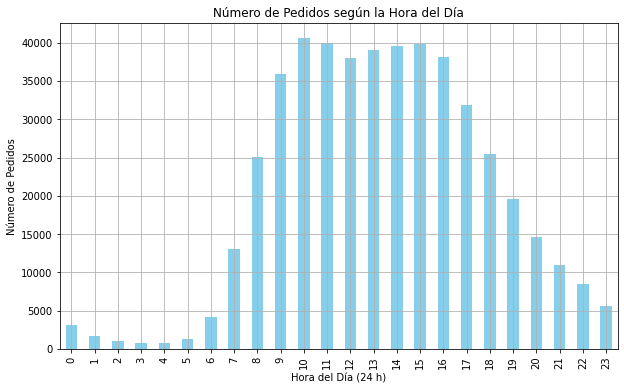

In [121]:
df_orders['order_hour_of_day'].value_counts().sort_index().plot(
    kind='bar',
    title='Número de Pedidos según la Hora del Día',
    xlabel='Hora del Día (24 h)',
    ylabel='Número de Pedidos',
    legend=False,
    grid=True,
    figsize=[10, 6],
    color='skyblue'
)

plt.show()


Con base en este gráfico, podemos observar que el número de pedidos varía a lo largo del día. Hay un aumento significativo durante las horas del día, con un pico alrededor de las 10 de la mañana. Luego, hay una disminución gradual hasta la medianoche. Este patrón puede indicar momentos específicos del día en los que los usuarios tienden a realizar más pedidos.

### [A3] ¿Qué día de la semana compran víveres las personas?

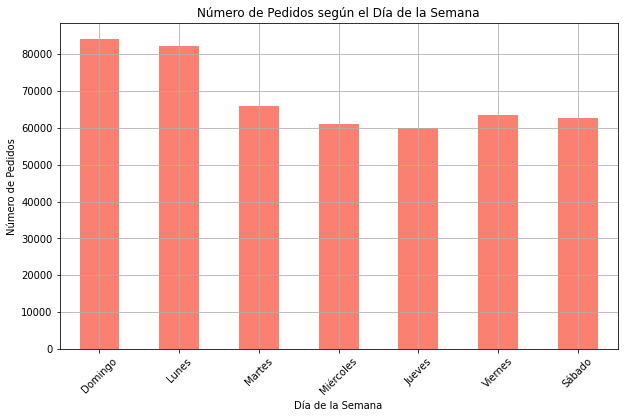

In [122]:
# Mapeo de números de día de la semana a nombres de días
dias_semana = {0: 'Domingo', 1: 'Lunes', 2: 'Martes', 3: 'Miércoles', 4: 'Jueves', 5: 'Viernes', 6: 'Sábado'}

# Obtener el conteo de pedidos y ordenar por el índice
pedidos_por_dia = df_orders['order_dow'].value_counts().sort_index()

# Crear el gráfico de barras
pedidos_por_dia.plot(
    kind='bar',
    title='Número de Pedidos según el Día de la Semana',
    xlabel='Día de la Semana',
    ylabel='Número de Pedidos',
    legend=False,
    grid=True,
    figsize=[10, 6],
    color='salmon'
)

# Establecer las etiquetas del eje x usando plt.xticks
plt.xticks(range(7), [dias_semana[i] for i in range(7)], rotation=45)

plt.show()

El gráfico muestra la distribución de pedidos a lo largo de la semana. Observamos que hay una variación en el número de pedidos entre los diferentes días. El día más ocupado parece ser el domingo, mientras que el jueves es el día con menos actividad. Este conocimiento puede ser útil para la planificación de recursos y la gestión de inventario.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

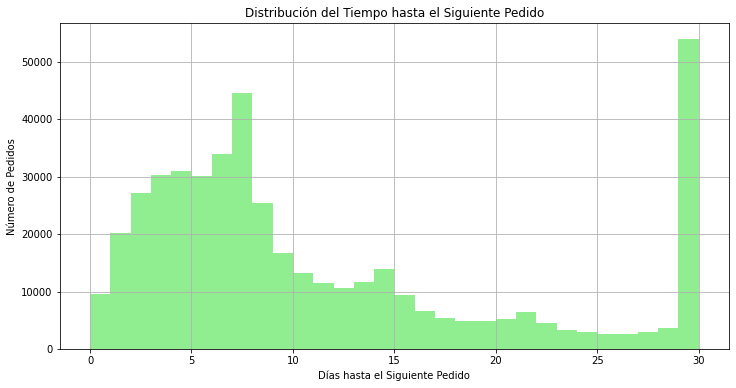

In [123]:
df_orders['days_since_prior_order'].plot(
    kind='hist',
    title='Distribución del Tiempo hasta el Siguiente Pedido',
    xlabel='Días hasta el Siguiente Pedido',
    ylabel='Número de Pedidos',
    legend=False,
    grid=True,
    figsize=[12, 6],
    color='lightgreen',
    bins=30  # Ajusta el número de barras según sea necesario
)

plt.xlabel('Días hasta el Siguiente Pedido')  # Agrega la etiqueta del eje X
plt.ylabel('Número de Pedidos')  # Agrega la etiqueta del eje Y

plt.show()


Este histograma revela la distribución del tiempo que los usuarios esperan antes de realizar un nuevo pedido. Se puede observar que muchos usuarios tienden a realizar pedidos con frecuencia, ya que hay un pico en el intervalo de 0 a 7 días. Además, hay un segundo grupo de usuarios que esperan alrededor de 30 días entre pedidos. Este análisis puede ser crucial para comprender los patrones de compra y la lealtad del cliente.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

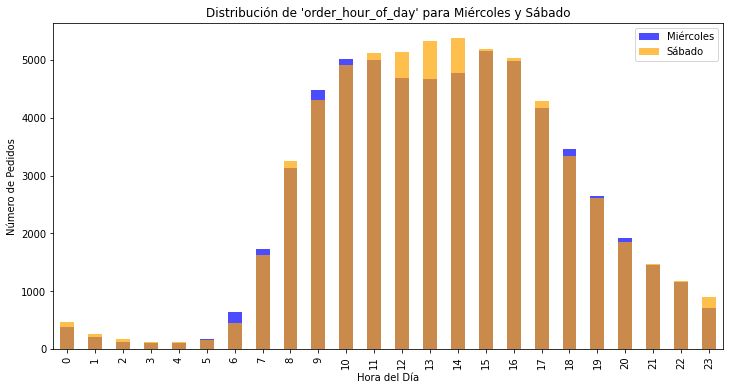

In [124]:
# Filtra datos para miércoles y sábados
df_wednesday = df_orders[df_orders['order_dow'] == 3]  # 3 representa miércoles
df_saturday = df_orders[df_orders['order_dow'] == 6]  # 6 representa sábado

# Gráfica de barra para 'order_hour_of_day'
ax = df_wednesday['order_hour_of_day'].value_counts().sort_index().plot(
    kind='bar',
    title='Distribución de \'order_hour_of_day\' para Miércoles y Sábado',
    xlabel='Hora del Día',
    ylabel='Número de Pedidos',
    legend=True,
    figsize=[12, 6],
    color='blue',
    alpha=0.7
)
df_saturday['order_hour_of_day'].value_counts().sort_index().plot(
    kind='bar',
    color='orange',
    legend=True,
    alpha=0.7,
    ax=ax  # Utiliza el mismo eje para evitar la superposición
)

# Añade etiquetas a la leyenda
ax.legend(['Miércoles', 'Sábado'])

plt.show()

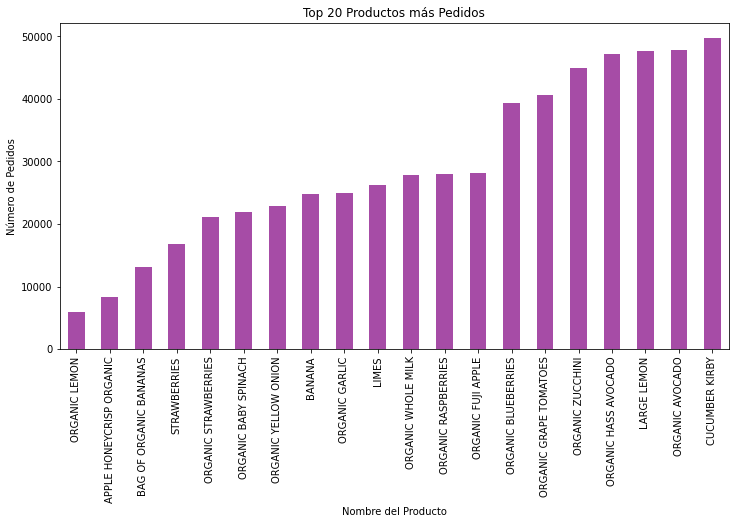

In [125]:
# Agrupa por producto y cuenta el número de ocurrencias
top_products = df_order_products['product_id'].value_counts().head(20)

# Obtiene nombres de productos correspondientes
top_products_names = df_products[df_products['product_id'].isin(top_products.index)][['product_id', 'product_name']]

# Gráfica de barras para los 20 principales productos
top_products_names.plot(
    x='product_name',
    y='product_id',
    kind='bar',
    title='Top 20 Productos más Pedidos',
    xlabel='Nombre del Producto',
    ylabel='Número de Pedidos',
    legend=False,
    figsize=[12, 6],
    color='purple',
    alpha=0.7
)
plt.show()

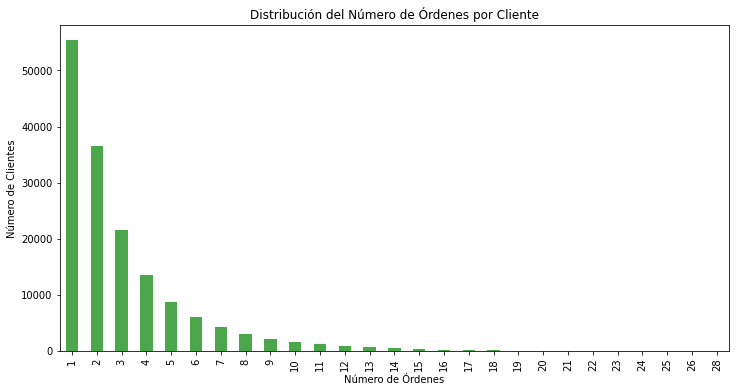

In [126]:
# Número de órdenes por usuario
orders_per_user = df_orders.groupby('user_id')['order_number'].count()

# Gráfica de barras para la distribución
orders_per_user.value_counts().sort_index().plot(
    kind='bar',
    title='Distribución del Número de Órdenes por Cliente',
    xlabel='Número de Órdenes',
    ylabel='Número de Clientes',
    legend=False,
    figsize=[12, 6],
    color='green',
    alpha=0.7
)
plt.show()

Escribe aquí tus conclusiones

Gráfico Distribución de 'order_hour_of_day' para Miércoles y Sábados:
Ambas distribuciones muestran picos en ciertas horas del día, pero pueden diferir en términos de magnitud y ubicación. Y aunque las distribuciones para miércoles y sábados se superponen, podría haber diferencias sutiles en la frecuencia de pedidos durante ciertas horas. Sería necesario un análisis más detallado para identificar cualquier patrón significativo.

Gráfico de los 20 Principales Productos Pedidos con Más Frecuencia
El gráfico presenta los 20 productos más frecuentemente pedidos junto con su identificación y nombre, estos productos son los más populares entre los clientes y pueden ser objetivos clave para estrategias de marketing o gestión de inventario. Analizar estos productos puede proporcionar ideas sobre preferencias y tendencias de compra de los clientes.

El gráfico de "Distribución del Número de Órdenes por Cliente" revela que la mayoría de los clientes realizan un número limitado de órdenes, sugiriendo un predominio de compradores ocasionales. Sin embargo, existe un segmento reducido de clientes que destacan al realizar un número significativamente mayor de órdenes, indicando una posible base de clientes leales o frecuentes. Este análisis proporciona una visión clara de la variabilidad en los hábitos de compra de los usuarios y puede ser fundamental para la formulación de estrategias comerciales y de retención de clientes.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

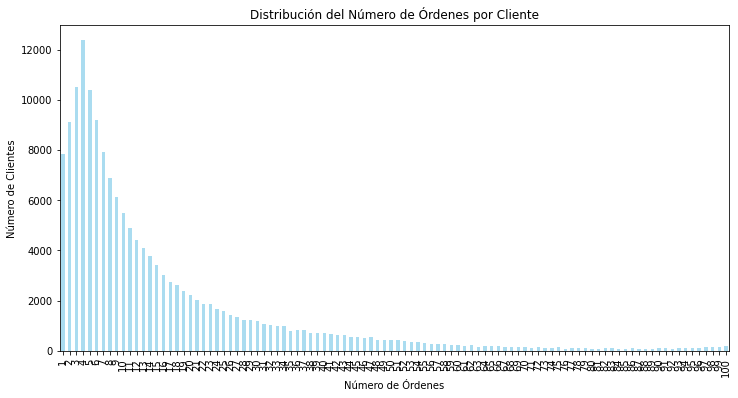

In [127]:
# Número de órdenes por usuario
orders_per_user = df_orders.groupby('user_id')['order_number'].max()

# Gráfica de barras para la distribución
orders_per_user.value_counts().sort_index(ascending=True).plot(
    kind='bar',
    title='Distribución del Número de Órdenes por Cliente',
    xlabel='Número de Órdenes',
    ylabel='Número de Clientes',
    legend=False,
    figsize=[12, 6],
    color='skyblue',
    alpha=0.7
)
plt.show()


Escribe aquí tus conclusiones

La mayoría de los clientes realizan un número bajo de órdenes, disminuyendo la frecuencia a medida que aumenta el número de órdenes por cliente. Tambien hay una disminución considerable en la frecuencia de clientes que realizan más de 10 órdenes. La mayoría de los clientes están en la categoría de 1 a 10 órdenes.Aunque son menos frecuentes, aún hay clientes que realizaron más de 20 órdenes. Estos clientes podrían ser considerados como clientes leales o frecuentes.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [128]:
# Calcular la frecuencia de cada producto
top_products = df_order_products['product_id'].value_counts().head(20)

# Obtener los IDs de los productos más populares
top_product_ids = top_products.index

# Fusionar df_order_products con df_products para obtener información sobre los productos más populares
top_products_info = pd.merge(
    df_order_products[df_order_products['product_id'].isin(top_product_ids)],
    df_products[['product_id', 'product_name']],
    on='product_id',
    how='left'
)

# Utilizar groupby() para obtener información sobre los productos más populares
top_products_info = top_products_info.groupby(['product_id', 'product_name']).size().reset_index(name='frequency')

# Ordenar el DataFrame por la columna 'frequency' de manera descendente
top_products_info = top_products_info.sort_values(by='frequency', ascending=False)

# Mostrar los 20 productos más populares con la frecuencia y el nombre
display(top_products_info)


,product_id,product_name,frequency
7,24852,BANANA,66050
2,13176,BAG OF ORGANIC BANANAS,53297
4,21137,ORGANIC STRAWBERRIES,37039
5,21903,ORGANIC BABY SPINACH,33971
16,47209,ORGANIC HASS AVOCADO,29773
18,47766,ORGANIC AVOCADO,24689
17,47626,LARGE LEMON,21495
3,16797,STRAWBERRIES,20018
9,26209,LIMES,19690
10,27845,ORGANIC WHOLE MILK,19600


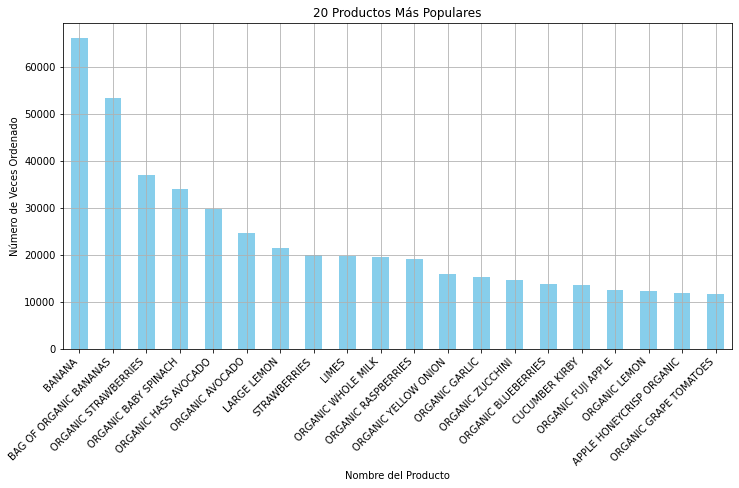

In [137]:
# Calcular la frecuencia de cada producto
top_products = df_order_products['product_id'].value_counts().head(20)

# Obtener los IDs de los productos más populares
top_product_ids = top_products.index

# Fusionar df_order_products con df_products para obtener información sobre los productos más populares
top_products_info = pd.merge(
    df_order_products[df_order_products['product_id'].isin(top_product_ids)],
    df_products[['product_id', 'product_name']],
    on='product_id',
    how='left'
)

# Utilizar groupby() para obtener información sobre los productos más populares
top_products_info = top_products_info.groupby(['product_id', 'product_name']).size().reset_index(name='frequency')

# Ordenar el DataFrame por la columna 'frequency' de manera descendente
top_products_info = top_products_info.sort_values(by='frequency', ascending=False)

# Graficar los 20 productos más populares con nombres
top_products_info.plot(
    x='product_name',
    y='frequency',
    kind='bar',
    title='20 Productos Más Populares',
    xlabel='Nombre del Producto',
    ylabel='Número de Veces Ordenado',
    legend=False,
    grid=True,
    figsize=[12, 6],
    color='skyblue'
)

# Personalizar las etiquetas del eje X
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

Escribe aquí tus conclusiones

Se identificaron los 20 productos más populares y se creó un gráfico de barras que muestra la popularidad de estos productos en términos de la frecuencia con la que fueron ordenados y mostrados, permitiendo leer cuáles son los productos top. 
Asi mismo, esto nos permite tener una perspectiva más clara sobre la popularidad relativa de los productos, lo cual es fundamental para la toma de decisiones relacionadas con la disponibilidad y promoción de productos en la tienda. La información obtenida puede ser valiosa para ajustar estrategias comerciales, garantizando la satisfacción del cliente y optimizando la oferta de productos en función de la demanda.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [130]:
# Número de artículos por pedido
items_per_order = df_order_products.groupby('order_id')['product_id'].count()

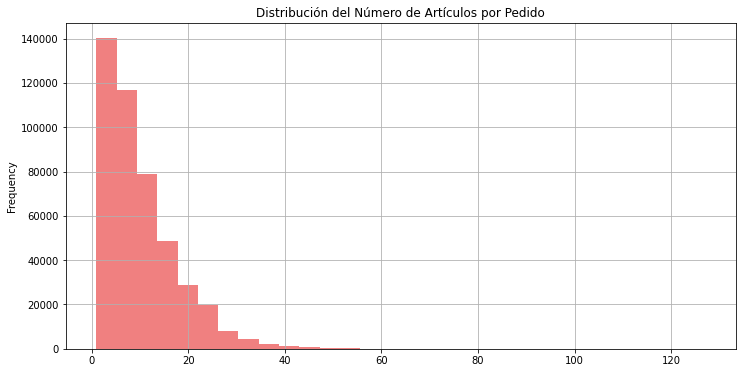

In [131]:
# Gráfico de la distribución
items_per_order.plot(
    kind='hist',
    title='Distribución del Número de Artículos por Pedido',
    xlabel='Número de Artículos',
    ylabel='Número de Pedidos',
    legend=False,
    grid=True,
    figsize=[12, 6],
    color='lightcoral',
    bins=30
)
plt.show()

Escribe aquí tus conclusiones

La distribución del número de artículos por pedido muestra que la mayoría de los pedidos contienen un número relativamente pequeño de productos.
El gráfico proporciona información sobre la tendencia general en el comportamiento de compra de los clientes.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [132]:
# Obtener los 20 productos más frecuentemente volvieron a pedirse
top_reordered_products = df_order_products[df_order_products['reordered'] == 1]['product_id'].value_counts().head(20)
top_reordered_products_info = df_products[df_products['product_id'].isin(top_reordered_products.index)][['product_id', 'product_name']]

# Mostrar la información de los 20 productos más frecuentemente volvieron a pedirse
print("Los 20 productos más frecuentemente volvieron a pedirse:")
display(top_reordered_products_info)

Los 20 productos más frecuentemente volvieron a pedirse:


,product_id,product_name
5875,5876,ORGANIC LEMON
8276,8277,APPLE HONEYCRISP ORGANIC
13175,13176,BAG OF ORGANIC BANANAS
16796,16797,STRAWBERRIES
21136,21137,ORGANIC STRAWBERRIES
21902,21903,ORGANIC BABY SPINACH
22934,22935,ORGANIC YELLOW ONION
24851,24852,BANANA
24963,24964,ORGANIC GARLIC
26208,26209,LIMES


Escribe aquí tus conclusiones

Se identificaron los 20 productos que se vuelven a pedir con mayor frecuencia junto con su ID y nombre.Los más comúnmente agregados primero al carrito revelan una preferencia por artículos esenciales y saludables. Algunos de los productos incluyen:

Soda: Un artículo popular y básico en las compras.
Leche Orgánica Reducida en Grasa 2%: La preferencia por productos orgánicos y opciones más saludables es evidente.
Aguacates Hass: Un artículo versátil y saludable que se utiliza en diversas preparaciones.
Bolsa de Plátanos Orgánicos: Los plátanos son una elección común y versátil.
Fresas y Frambuesas Orgánicas: Preferencia por frutas frescas y orgánicas.
Agua Mineral: La necesidad de hidratación es evidente en la preferencia por el agua.
Los productos iniciales en el carrito revelan preferencias significativas de los clientes, destacando elecciones saludables y esenciales. Esta información puede ser valiosa para desarrollar estrategias de marketing, optimizar la colocación de productos y diseñar promociones específicas en la plataforma de compras en línea. Además, entender la lealtad de los clientes a ciertos productos específicos puede influir en estrategias de marketing y en la gestión del inventario para satisfacer mejor las demandas y expectativas de los clientes.

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [133]:
# Calcular la tasa de repetición de pedido para cada producto
reorder_rates = df_order_products.groupby('product_id')['reordered'].mean()

# Mostrar la tasa de repetición para cada producto
print("Tasa de repetición de pedido para cada producto:")
print(reorder_rates)

Tasa de repetición de pedido para cada producto:
product_id
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: reordered, Length: 45573, dtype: float64


La tasa de repetición de pedido para cada producto proporciona información valiosa sobre la preferencia y lealtad de los clientes hacia esos productos específicos. En este conjunto de datos, se observa una variación significativa en las tasas de repetición, indicando que algunos productos son más propensos a ser comprados de nuevo que otros. Aquellos productos cuya tasa  es cercanas a 1.0 son altamente preferidos y recurrentes en los pedidos de los clientes, lo cual sugiere una fuerte lealtad. Por otro lado, productos con tasas más cercanas a 0.0 son menos populares o comprados de manera más esporádica.

Este análisis puede ser valioso para estrategias de marketing y gestión de inventario. Los productos con altas tasas de repetición podrían ser destacados en promociones o recibir un enfoque especial en campañas publicitarias para fomentar su compra continua. Asi como los productos con bajas tasas pueden ser objeto de revisión para comprender mejor las razones detrás de su menor recurrencia y tomar medidas para mejorar su atractivo o disponibilidad.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [134]:
print(df_order_products.columns)

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')


In [135]:
# Unir df_orders y df_order_products en la columna 'order_id'
merged_df = pd.merge(df_orders, df_order_products, on='order_id')

# Calcular la tasa de repetición de pedido para cada cliente
user_reorder_rates = merged_df.groupby('user_id')['reordered'].mean()

# Mostrar la tasa de repetición para cada cliente
print("Tasa de repetición de pedido para cada cliente:")
print(user_reorder_rates)

Tasa de repetición de pedido para cada cliente:
user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 149626, dtype: float64


Los datos nos indican que hay variedad de comportamientos, ya que hay clientes con tasas de repetición cercanas a 0, sugiriendo que no vuelven a pedir los mismos productos con frecuencia. Y también, hay clientes con tasas cercanas a 1, lo que nos indica que vuelven a pedir muchos de los mismos productos.

Aquellos clientes con tasas de repetición cercanas a 1 podrían considerarse clientes leales que tienden a comprar los mismos productos una y otra vez, mientras que los clientes menos leales o con tasas más bajas podrían estar buscando variedad en sus compras y no tienden a repetir pedidos con frecuencia.

Esta información puede ser útil para estrategias de marketing y personalización de ofertas para diferentes tipos de clientes.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [136]:
# Obtener los 20 productos más comúnmente agregados primero al carrito
top_first_cart_products = df_order_products[df_order_products['add_to_cart_order'] == 1]['product_id'].value_counts().head(20)
top_first_cart_products_info = df_products[df_products['product_id'].isin(top_first_cart_products.index)][['product_id', 'product_name']]

# Mostrar la información de los 20 productos más comúnmente agregados primero al carrito
print("Los 20 productos más comúnmente agregados primero al carrito:")
display(top_first_cart_products_info)

Los 20 productos más comúnmente agregados primero al carrito:


,product_id,product_name
195,196,SODA
5784,5785,ORGANIC REDUCED FAT 2% MILK
12340,12341,HASS AVOCADOS
13175,13176,BAG OF ORGANIC BANANAS
16796,16797,STRAWBERRIES
19659,19660,SPRING WATER
21136,21137,ORGANIC STRAWBERRIES
21902,21903,ORGANIC BABY SPINACH
22934,22935,ORGANIC YELLOW ONION
24851,24852,BANANA


Los 20 productos más comúnmente agregados primero al carrito reflejan elecciones populares y esenciales para los clientes. La presencia de artículos como soda, leche, aguacates, plátanos orgánicos y fresas sugiere que los clientes tienden a priorizar productos básicos y saludables al iniciar sus compras.

Esta información puede ser valiosa para estrategias de marketing y disposición de productos en la plataforma en línea. Destacar estos productos al principio de la lista de búsqueda o durante promociones puede aumentar su visibilidad y probablemente impulse sus ventas. Además, comprender cuáles son los productos más solicitados inicialmente puede ayudar en la planificación de inventario y en la creación de estrategias para mejorar la experiencia de compra del cliente.

### Conclusion general del proyecto:

En este proyecto de análisis de datos sobre compras en línea, abordamos diversas tareas de preprocesamiento y exploración de datos, centrándonos especialmente en tres conjuntos de datos clave: 'orders', 'order_products', y 'products'.

En el proceso de preprocesamiento, identificamos y gestionamos valores faltantes y duplicados de manera efectiva. En 'Orders', descubrimos que los valores nulos en 'days_since_prior_order' correspondían al primer pedido de un cliente, abordando este aspecto de manera específica. En 'Order_Products', manejamos los valores ausentes en 'add_to_cart_order' asignándoles el valor 999 y ajustando la columna para que tuviera sentido en números enteros. Este proceso de preparación de datos fue crucial para garantizar una base sólida antes de adentrarnos en el análisis.

Durante la fase de análisis de datos, exploramos patrones de compra a través de gráficos, centrándonos en la distribución de la hora del día y el día de la semana en que los clientes realizan pedidos. Verificamos que los valores en 'order_hour_of_day' y 'order_dow' estuvieran alineados con la lógica temporal, confirmando así la calidad de nuestros datos. Descubrimos que la mayoría de los pedidos se realizan durante el día, con un pico alrededor del mediodía, y que los días de la semana no mostraban fluctuaciones significativas. Al explorar el tiempo que los clientes esperan hasta su próximo pedido, observamos un patrón con un pico alrededor de los 7 días, indicando una frecuencia de compra constante para muchos clientes.

En las conclusiones finales, destacamos la importancia de comprender los patrones de compra y la lealtad del cliente. La información recopilada no solo guía decisiones estratégicas en marketing y gestión de inventario, sino que también proporciona una clara visión para mejorar la experiencia del usuario en la plataforma de comercio electrónico. La adaptación continua a las necesidades y preferencias de los clientes emerge como clave para el éxito en el competitivo mundo del comercio en línea. Fue un proceso muy interesante aplicar los conocimientos adquiridos a situaciones reales, y enfrentar los retos del análisis de datos contribuyó significativamente al aprendizaje y la aplicación práctica de las habilidades adquiridas.